# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
#url for weather map api
weather_map_url = f'https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}'
#create lists/columns
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 1
record_set = 1

#print statement for data retrieval
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    try:
        #pull info of each city from api into json
        response = requests.get(f'{weather_map_url}&q={city}').json()
        
        #append to each list except for city
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #if count record hits 50 then move to next set and reset count to 1, else keep counting to 50 cities
        if record > 49:
            record = 1
            record_set += 1
            city_name.append(city)
        else:
            record += 1
            city_name.append(city)
        print(f'Processing Record {record} of Set {record_set} | {city}')
    except:
        print('City not found. Skipping...')
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | santa maria del oro
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | portland
Processing Record 8 of Set 1 | kensington
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | piacabucu
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | waddan
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | casa grande
Processing Record 20 of Set 1 | villarrica
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | nikolskoye
Processing Record 24 of Set

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name,"Lat": lat,"Lng":lng, 
                           "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness, 
                           "Wind Speed":wind_speed,"Country":country, "Date":date})

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa maria del oro,25.9333,-105.3667,51.28,39,35,9.57,MX,1674009019
1,ushuaia,-54.8000,-68.3000,56.86,62,20,6.91,AR,1674008879
2,hermanus,-34.4187,19.2345,72.81,89,98,8.72,ZA,1674009020
3,lebu,-37.6167,-73.6500,54.99,92,10,9.89,CL,1674009020
4,cherskiy,68.7500,161.3000,-48.68,99,68,4.18,RU,1674009021


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa maria del oro,25.9333,-105.3667,51.28,39,35,9.57,MX,1674009019
1,ushuaia,-54.8000,-68.3000,56.86,62,20,6.91,AR,1674008879
2,hermanus,-34.4187,19.2345,72.81,89,98,8.72,ZA,1674009020
3,lebu,-37.6167,-73.6500,54.99,92,10,9.89,CL,1674009020
4,cherskiy,68.7500,161.3000,-48.68,99,68,4.18,RU,1674009021


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

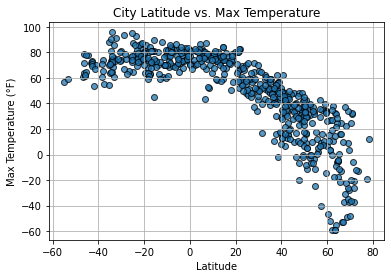

<Figure size 432x288 with 0 Axes>

In [35]:
# Build scatter plot for latitude vs. temperature
plt.ioff
fig1 = plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig1.png")
plt.show()

# Save the figure
plt.savefig("output_data/fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

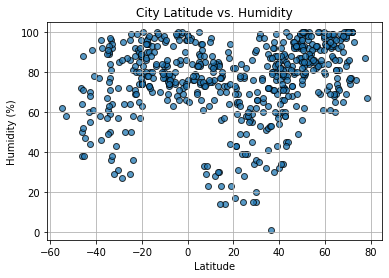

<Figure size 432x288 with 0 Axes>

In [36]:
# Build the scatter plots for latitude vs. humidity
fig2 = plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig2.png")
plt.show()

# Save the figure
plt.savefig("output_data/fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

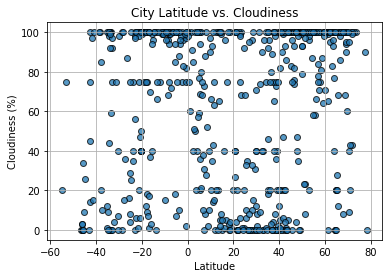

<Figure size 432x288 with 0 Axes>

In [37]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()
# Save the figure
plt.savefig("output_data/fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

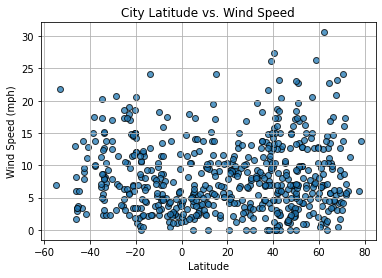

<Figure size 432x288 with 0 Axes>

In [38]:
# Build the scatter plots for latitude vs. wind speed
fig4 = plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/fig4.png")
plt.show()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
northen_hemispere = city_data_df.loc[city_data_df['Lat'] > 0]
southern_hemisphere = city_data_df.loc[city_data_df['Lat'] < 0]
                    
def plot_lin_regression(x_values,y_values,xtitle,ytitle,x_coord, y_coord):
    #lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    print(line_equation)

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_value, 'r-')
    plt.annotate(line_equation, (x_coord, y_coord), fontsize = 20, color = "red")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(True)

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7021944682883747
y = -1.37x + 90.1


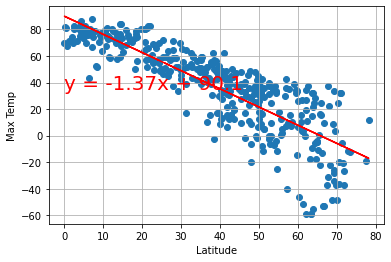

In [41]:
# Linear regression on Northern Hemisphere
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', 0,35)
plt.show()

The r-squared is: 0.0608382584281739
y = 0.16x + 77.79


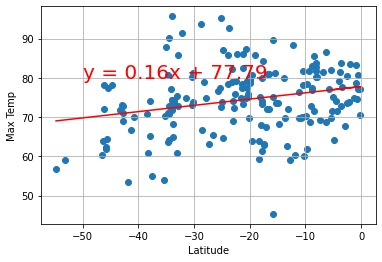

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', -50, 80)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11777232739949545
y = 0.34x + 62.92


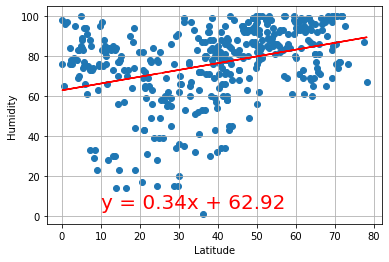

In [43]:
# Northern Hemisphere
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', 10, 4)
plt.show()

The r-squared is: 0.16425262390413628
y = 0.52x + 87.79


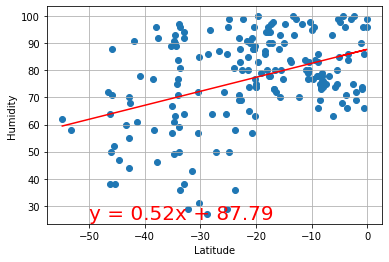

In [44]:
# Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', -50, 25)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07734552793439715
y = 0.56x + 41.12


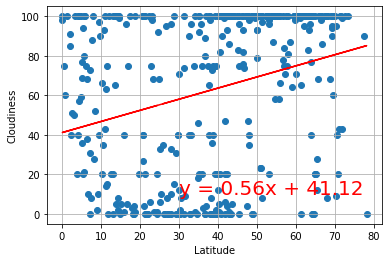

In [45]:
# Northern Hemisphere
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', 30, 10)
plt.show()

The r-squared is: 0.16814368548668596
y = 1.24x + 91.64


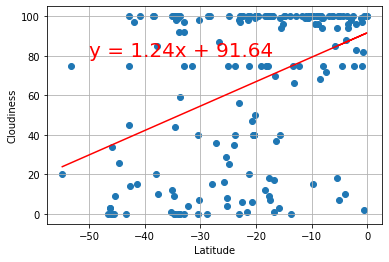

In [46]:
# Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', -50, 80)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015048376680140696
y = 0.03x + 6.91


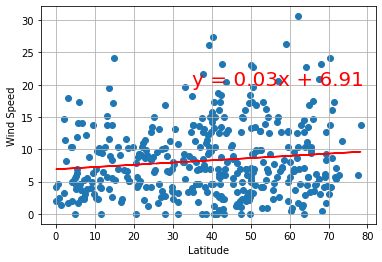

In [47]:
# Northern Hemisphere
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Wind Speed']

plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', 35, 20)
plt.show()

The r-squared is: 0.05601235313813206
y = -0.09x + 6.11


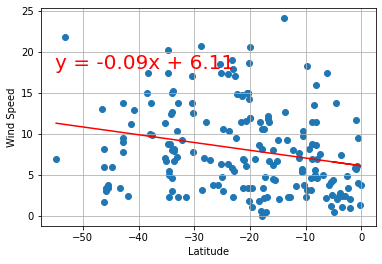

In [48]:
# Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', -55, 18)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE